# dowload kaggle dataset

In [1]:
!pip install -q kaggle

In [2]:
# upload kaggle.json

In [3]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/jovyan/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
# example dataset
!kaggle datasets list

ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023              47KB  2023-08-26 11:04:57          20667        642  1.0              
emilrueh/laptops-and-notebooks-from-2020-2023              Laptops and Notebooks from 2020-2023          79KB  2023-09-29 15:14:05           1077         30  1.0              
joebeachcapital/students-performance                       Students Performance                           2KB  2023-08-31 00:50:11           7483        183  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023     143MB  2023-09-1

In [6]:
# dowload dataset from kaggle api
# https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

In [7]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 99%|█████████████████████████████████████▌| 28.0M/28.4M [00:02<00:00, 19.8MB/s]
100%|██████████████████████████████████████| 28.4M/28.4M [00:02<00:00, 10.5MB/s]


In [8]:
!unzip fruit-images-for-object-detection.zip

Archive:  fruit-images-for-object-detection.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple_84.jpg  
  inflating: test_zip/test/apple_84.xml  
  inflating: test_zip/test/apple_85.jpg  
  inflating: test_zip/test/apple_85.xml  
  inflating: test_zip/test/apple_86.jpg  
  inflating: test_zip/test/apple_86.xml  
  inflating: test_zip/test/apple_87.jpg  
  inflating: test_zip/test/apple_87.xml  
  inflating: test_zip/test/a

In [9]:
# แตกไฟล์และลบ zip

#Predata

In [10]:
# upload set_yolov8.zip
# แตกไฟล์และลบ zip

In [11]:
!git clone https://git-ai.inet-th.net/suphanat.bo/set_yolov8.git

fatal: destination path 'set_yolov8' already exists and is not an empty directory.


In [12]:
# !unzip set_yolov8.zip

In [13]:
# import lib
from pathlib import Path
import xml.etree.ElementTree as ET
import os
import pandas as pd

In [14]:
# path_img = "/content/images"
# img_path = os.listdir(path_img)
# print("count image",len(img_path))

In [15]:
# path_label = "/content/annotations"
# label_path = os.listdir(path_label)
# print("count label",len(label_path))

In [16]:


def filelist(root, file_type):
    return [os.path.join(directory_path, f) for directory_path, directory_name,
            files in os.walk(root) for f in files if f.endswith(file_type)]

def generate_train_df (anno_path, anno_path2):
    annotations = filelist(anno_path, '.xml')
    annotations2 = filelist(anno_path2, '.xml')
    anno_list = []
    for anno in annotations:
        root = ET.parse(anno).getroot()

        for object in root.findall("./object"):
            anno = {}
            anno['filename'] = root.find("./filename").text
            anno['width'] = float(root.find("./size/width").text)
            anno['height'] = float(root.find("./size/height").text)
            anno['label'] = str(object.find("./name").text)
            anno['xmin'] = int(object.find("./bndbox/xmin").text)
            anno['ymin'] = int(object.find("./bndbox/ymin").text)
            anno['xmax'] = int(object.find("./bndbox/xmax").text)
            anno['ymax'] = int(object.find("./bndbox/ymax").text)
            anno['path'] = str(root.find("./folder").text)+("_zip/")+str(root.find("./folder").text)+("/")
            anno_list.append(anno)

    for anno in annotations2:
        root = ET.parse(anno).getroot()

        for object in root.findall("./object"):
            anno = {}
            anno['filename'] = root.find("./filename").text
            anno['width'] = float(root.find("./size/width").text)
            anno['height'] = float(root.find("./size/height").text)
            anno['label'] = str(object.find("./name").text)
            anno['xmin'] = int(object.find("./bndbox/xmin").text)
            anno['ymin'] = int(object.find("./bndbox/ymin").text)
            anno['xmax'] = int(object.find("./bndbox/xmax").text)
            anno['ymax'] = int(object.find("./bndbox/ymax").text)
            anno['path'] = str(root.find("./folder").text)+("_zip/")+str(root.find("./folder").text)+("/")
            anno_list.append(anno)
    return pd.DataFrame(anno_list)

def split_df(anno_path):
    annotations = filelist(anno_path, '.xml')
    anno_list = []
    for anno in annotations:
        root = ET.parse(anno).getroot()

        for object in root.findall("./object"):
            anno = {}
            anno['filename'] = root.find("./filename").text
            anno['width'] = float(root.find("./size/width").text)
            anno['height'] = float(root.find("./size/height").text)
            anno['label'] = str(object.find("./name").text)
            anno['xmin'] = int(object.find("./bndbox/xmin").text)
            anno['ymin'] = int(object.find("./bndbox/ymin").text)
            anno['xmax'] = int(object.find("./bndbox/xmax").text)
            anno['ymax'] = int(object.find("./bndbox/ymax").text)
            anno['path'] = str(root.find("./folder").text)+("_zip/")+str(root.find("./folder").text)+("/")
            anno_list.append(anno)
    return pd.DataFrame(anno_list)

In [17]:
anno_path = "train_zip"
anno_path2 = "test_zip"
df = generate_train_df(anno_path,anno_path2)
df_train = split_df(anno_path)
df_test = split_df(anno_path2)
df

,filename,width,height,label,xmin,ymin,xmax,ymax,path
0,apple_1.jpg,0.0,0.0,apple,8,15,331,349,train_zip/train/
1,apple_10.jpg,1500.0,1500.0,apple,56,99,1413,1419,train_zip/train/
2,apple_11.jpg,652.0,436.0,apple,213,33,459,258,train_zip/train/
3,apple_11.jpg,652.0,436.0,apple,1,30,188,280,train_zip/train/
4,apple_11.jpg,652.0,436.0,apple,116,5,337,220,train_zip/train/
...,...,...,...,...,...,...,...,...,...
577,orange_92.jpg,390.0,254.0,orange,174,20,364,199,test_zip/test/
578,orange_93.jpg,282.0,188.0,orange,43,57,143,160,test_zip/test/
579,orange_93.jpg,282.0,188.0,orange,148,62,249,162,test_zip/test/
580,orange_94.jpg,0.0,0.0,orange,111,51,372,277,test_zip/test/


In [18]:
# หา count filename

In [19]:
df['filename'].value_counts()

filename
mixed_17.jpg     9
apple_65.jpg     8
apple_52.jpg     8
banana_37.jpg    7
apple_46.jpg     7
                ..
banana_49.jpg    1
banana_53.jpg    1
banana_56.jpg    1
banana_57.jpg    1
orange_95.jpg    1
Name: count, Length: 300, dtype: int64

In [20]:
# หา count label

In [21]:
df['path'].value_counts()

path
train_zip/train/    465
test_zip/test/      117
Name: count, dtype: int64

In [22]:
df['label'].value_counts()

label
banana    209
apple     191
orange    182
Name: count, dtype: int64

In [23]:
# # plot image ตาม index datafame
# import matplotlib.pyplot as plt
# from PIL import Image,ImageDraw
# i = 100
# im = Image.open(f"test_zip/{df['filename'][i]}")
# plt.imshow(im)

In [24]:
# ให้ import LoadDataset จาก load_data_port.py

In [25]:
!pip install albumentations

In [26]:
from set_yolov8.objectdetection.load_data_port import LoadDataset

In [27]:
dataset = LoadDataset(dataframe = df, path_col = 'path', fileImg_col = "filename", label_col = "label", box_col=['xmin','ymin','xmax','ymax'])

In [28]:
# ให้ใช้ function Len,Get_dataframe,Label_,Plot_image,Multi_plot_image

In [29]:
dataset.Len()

300

In [30]:
dataset.Get_dataframe()

,filename,width,height,label,xmin,ymin,xmax,ymax,path
0,apple_1.jpg,0.0,0.0,apple,8,15,331,349,train_zip/train/
1,apple_10.jpg,1500.0,1500.0,apple,56,99,1413,1419,train_zip/train/
2,apple_11.jpg,652.0,436.0,apple,213,33,459,258,train_zip/train/
3,apple_11.jpg,652.0,436.0,apple,1,30,188,280,train_zip/train/
4,apple_11.jpg,652.0,436.0,apple,116,5,337,220,train_zip/train/
...,...,...,...,...,...,...,...,...,...
577,orange_92.jpg,390.0,254.0,orange,174,20,364,199,test_zip/test/
578,orange_93.jpg,282.0,188.0,orange,43,57,143,160,test_zip/test/
579,orange_93.jpg,282.0,188.0,orange,148,62,249,162,test_zip/test/
580,orange_94.jpg,0.0,0.0,orange,111,51,372,277,test_zip/test/


In [31]:
dataset.Label_()

{'apple': 0, 'banana': 1, 'orange': 2}

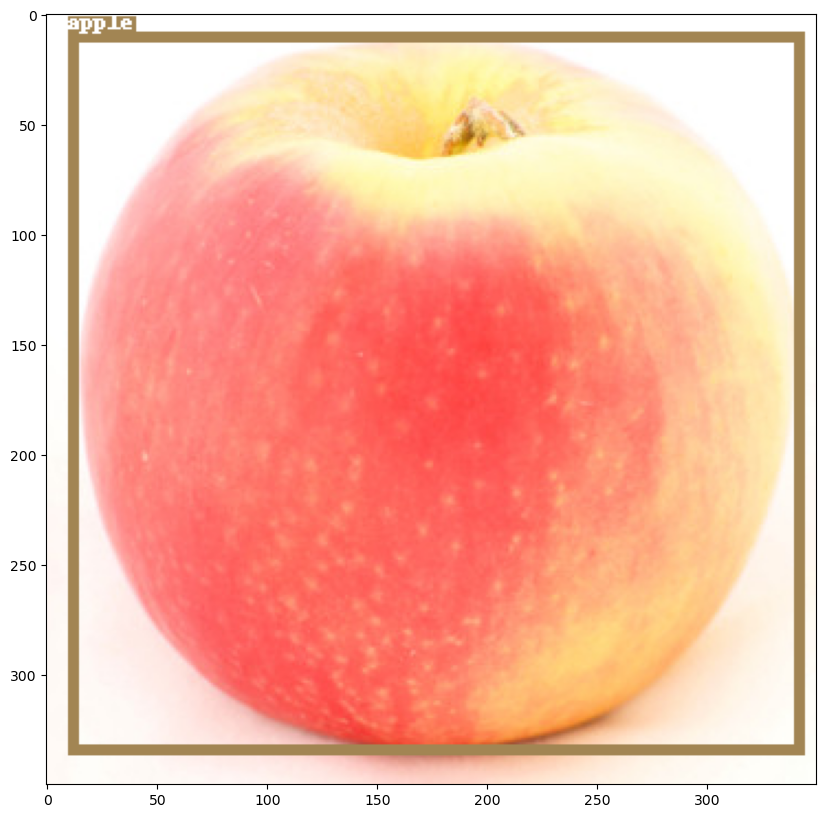

In [32]:
dataset.Plot_image(1)

In [33]:
dataset.Len()

300

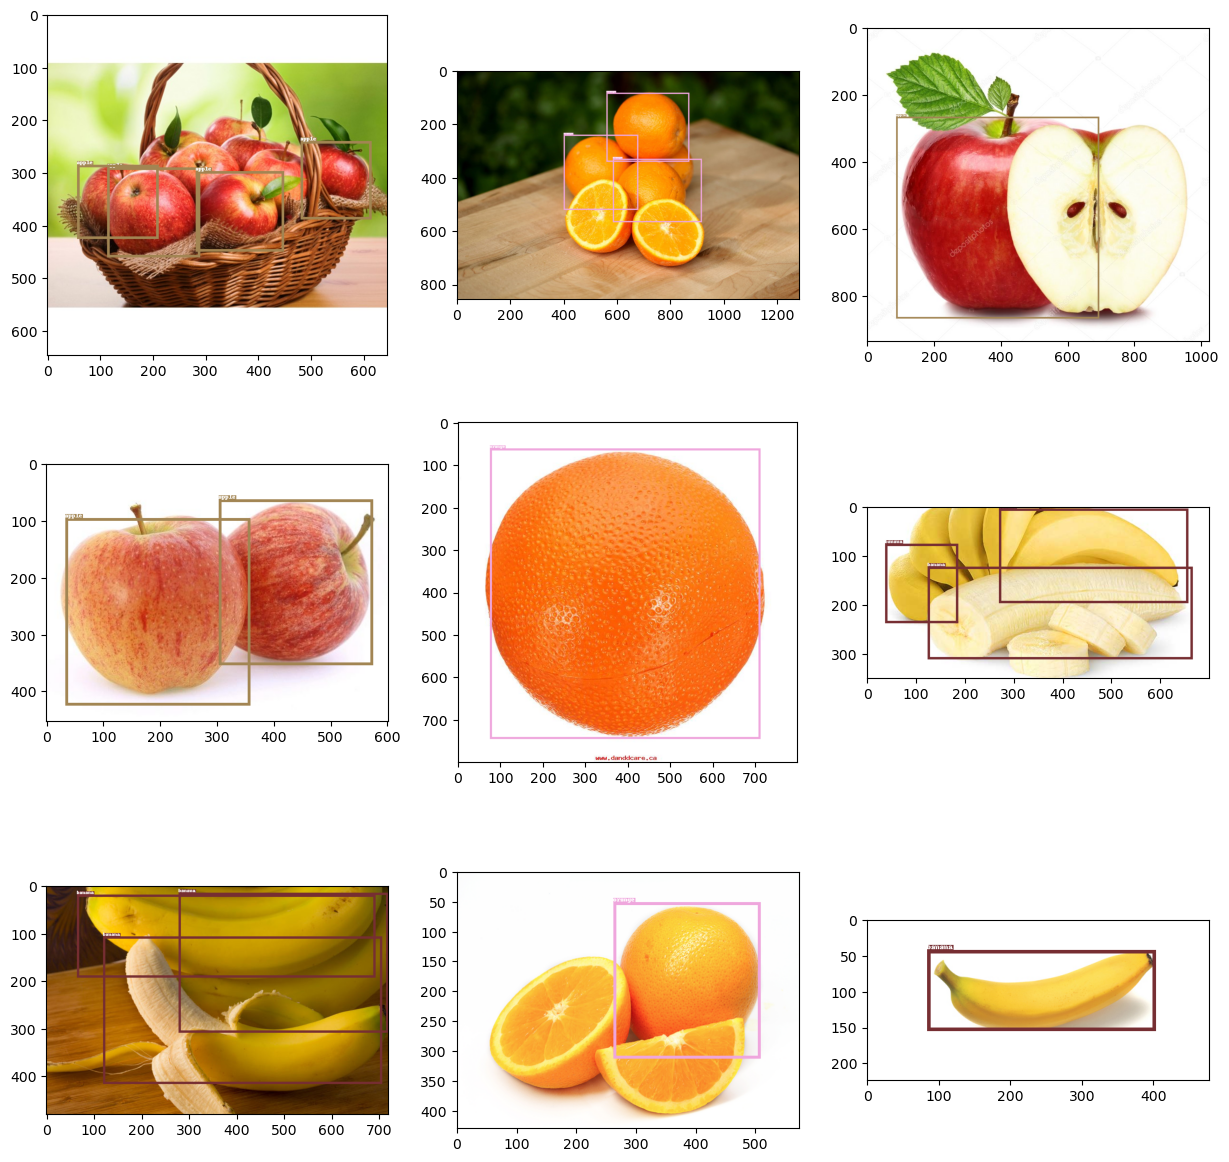

In [34]:
dataset.Multi_plot_image()

#Split data

In [35]:
train_set = LoadDataset(dataframe = df,
                        path_col = 'path',
                        fileImg_col = "filename",
                        label_col = "label",
                        box_col=['xmin','ymin','xmax','ymax'],
                        subset="train",split=(0.7,0.2,0.1))

In [36]:
len(train_set)

216

In [37]:
valid_set = LoadDataset(dataframe = df,
                        path_col = 'path',
                        fileImg_col = "filename",
                        label_col = "label",
                        box_col=['xmin','ymin','xmax','ymax'],
                        subset="valid",split=(0.7,0.2,0.1))

In [38]:
len(valid_set)

24

In [39]:
test_set = LoadDataset(dataframe = df_test,
                        path_col = 'path',
                        fileImg_col = "filename",
                        label_col = "label",
                        box_col=['xmin','ymin','xmax','ymax'],
                        subset="test",split=(0.7,0.2,0.1))

In [40]:
test_set.Len()

12

In [41]:
train_set.dataloader()
valid_set.dataloader()
test_set.dataloader()

  5%|▍         | 10/216 [00:00<00:04, 42.48it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 69%|██████▉   | 150/216 [00:03<00:01, 36.97it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 42%|████▏     | 10/24 [00:00<00:00, 44.73it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 12/12 [00:00<00:00, 47.86it/s]


In [42]:
# ให้ใช้ dataloader ทุก dataset

In [43]:
img_train = os.listdir("datasets/train/images")
print("Image train",len(img_train))
img_valid = os.listdir("datasets/valid/images")
print("Image valid",len(img_valid))
img_test = os.listdir("datasets/test/images")
print("Image test",len(img_test))

Image train 216
Image valid 24
Image test 12


In [44]:
lb_train = os.listdir("datasets/train/labels")
print("Label train",len(lb_train))
lb_valid = os.listdir("datasets/valid/labels")
print("Label valid",len(lb_valid))
lb_test = os.listdir("datasets/test/labels")
print("Label test",len(lb_test))

Label train 216
Label valid 24
Label test 12


# Train model yolov8

In [45]:
!pip install ultralytics

In [46]:
from ultralytics import YOLO

In [47]:
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")
# Use the model
model.train(data="data/data.yaml", epochs=10,imgsz=224)  # train the model
metrics = model.val(data="data/data.yaml")  # evaluate model performance on the validation set



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [48]:
# ให้ train model mAP50 >= 80%

#Predict

In [49]:
# daataset_test
test_set.Get_dataframe()

,path,filename,counts
0,test_zip/test/,apple_77.jpg,5
1,test_zip/test/,apple_82.jpg,1
2,test_zip/test/,banana_94.jpg,1
3,test_zip/test/,orange_80.jpg,1
4,test_zip/test/,apple_90.jpg,1
5,test_zip/test/,orange_90.jpg,5
6,test_zip/test/,banana_91.jpg,2
7,test_zip/test/,orange_83.jpg,1
8,test_zip/test/,apple_89.jpg,1
9,test_zip/test/,orange_93.jpg,2


In [8]:
path_img_test = "test_zip/test/mixed_21.jpg"
results = model.predict(path_img_test,save=True)


image 1/1 /home/jovyan/fruit_detection/test_zip/test/mixed_21.jpg: 160x224 1 apple, 5 oranges, 155.2ms
Speed: 2.8ms preprocess, 155.2ms inference, 2.3ms postprocess per image at shape (1, 3, 160, 224)
Results saved to runs/detect/predict2


In [9]:
path_predict = "runs/detect/predict"
list_pred = os.listdir(path_predict)

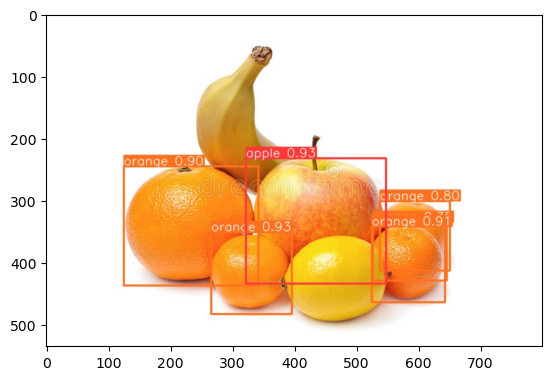

In [12]:
# ให้ plot image predict ตาม index
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
i = 0

im = Image.open(f"runs/detect/predict2/mixed_21.jpg")
# im = Image.open(os.path.join(path_predict,list_pred[i]))
plt.imshow(im)

#Export model

In [13]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")
model.export(format="openvino", dynamic=True, half=False)

Ultralytics YOLOv8.0.191 🚀 Python-3.10.11 torch-1.13.1+cu116 CPU (Intel Xeon Silver 4316 2.30GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 7, 1029) (21.4 MB)

ONNX: starting export with onnx 1.14.1 opset 16...
ONNX: export success ✅ 2.5s, saved as 'runs/detect/train/weights/best.onnx' (42.5 MB)

OpenVINO: starting export with openvino 2023.1.0-12185-9e6b00e51cd-releases/2023/1...
OpenVINO: export success ✅ 0.7s, saved as 'runs/detect/train/weights/best_openvino_model/' (42.7 MB)

Export complete (5.9s)
Results saved to /home/jovyan/fruit_detection/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_openvino_model imgsz=224  
Validate:        yolo val task=detect model=runs/detect/train/weights/best_openvino_model imgsz=224 data=data/data.yaml  
Visualize:       https://netr

'runs/detect/train/weights/best_openvino_model'

In [14]:
import yaml
yaml_file_path = 'runs/detect/train/weights/best_openvino_model/metadata.yaml'

with open(yaml_file_path, 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

model_imgsz = data['imgsz'][0]
model_imgsz

224

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os
import yaml
import openvino as ov

In [16]:
label_map = {
    0: 'apple',
    1: 'banana',
    2: 'orange'
}
IMAGE_PATH = Path('test_zip/test/mixed_21.jpg')
input_image = np.array(Image.open(IMAGE_PATH))
selected_device = "CPU"

In [17]:
conf=0.5
iou_conf=0.7

In [18]:
models_dir = Path('./models')
DET_MODEL_NAME = "best"
det_model_path = models_dir / f"{DET_MODEL_NAME}_openvino_model/{DET_MODEL_NAME}.xml"

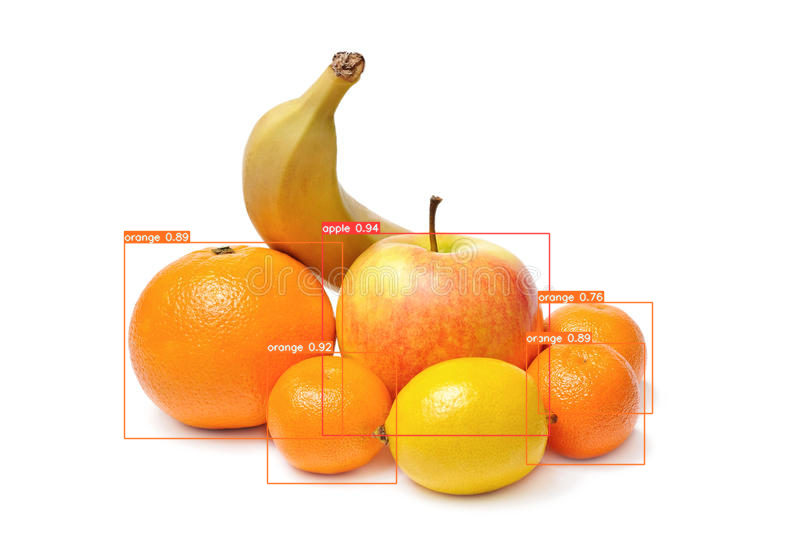

In [19]:
from pathlib import Path
import numpy as np
from set_vino.load_vino_port import LoadVino

det_model_path = "runs/detect/train/weights/best_openvino_model/best.xml"
selected_device = "CPU"

loader = LoadVino(det_model_path, selected_device, label_map, model_imgsz)
result = loader.process_output(input_image, input_image.shape[1], input_image.shape[0],conf, iou_conf)
image_with_boxes = loader.draw_results(result, input_image, label_map)

Image.fromarray(image_with_boxes)